## 🔹 Pedagogical Demo: Robust Markowitz Frontier with Interactive GUI

This Jupyter demo illustrates **robust portfolio optimization** using historical monthly returns of a set of assets, combined with **Ledoit-Wolf shrinkage** to stabilize covariance estimates. The purpose is to show how modern quantitative techniques can improve classical Markowitz optimization, and how students can **interactively explore the efficient frontier** and optimized allocations.

### Key Concepts Illustrated

1. **Covariance Shrinkage (Ledoit-Wolf):**
   - Historical sample covariance matrices are noisy, especially for many assets with limited data.
   - Shrinkage reduces estimation error, producing a more reliable input for portfolio optimization.

2. **Monte Carlo Resampling of Weights:**
   - Random portfolios are generated and their Sharpe ratios computed.
   - Repeated **resampling of mean returns** (via multivariate normal with shrunk covariance) produces a **stable tangent portfolio**, reducing sensitivity to historical noise.

3. **Tangent Portfolio & CML:**
   - The tangent portfolio maximizes the **Sharpe ratio**, i.e., return per unit of risk.
   - The **Capital Market Line (CML)** is drawn from the risk-free rate through the tangent point, illustrating the risk-return trade-off for leveraged portfolios.

4. **Interactive GUI:**
   - Hover over points to see Sharpe ratio and constituent weights.
   - Click **Apply Optimized Weights** to push the tangent portfolio allocations into your portfolio object.
   - Undo changes at any time.

5. **Visualization Details:**
   - Scatter plot shows thousands of random portfolios with color encoding the ex-ante Sharpe ratio.
   - Tangent portfolio highlighted in red; current portfolio in blue.
   - Text box annotates **optimized weights and Sharpe ratio** for reference.

### Educational Takeaways

- **Uncertainty Matters:** The frontier is a cloud, not a line — random weights produce a range of achievable outcomes.
- **Stabilization Techniques:** Ledoit-Wolf shrinkage and Monte Carlo resampling help avoid extreme, unrealistic portfolios.
- **Decision Support:** Students can see how changing allocations affects risk and return in real-time, linking theory to practice.

### Classic Example Outcome

Using a 5-asset portfolio, risk-free rate 2% annually, and robust resampling:

- **Stable Tangent Sharpe:** ~1.12  
- **Optimized Weights:** Displayed interactively in the GUI  
- **Efficient Frontier:** A cloud of feasible portfolios, with tangent portfolio and CML clearly visible

This demo connects theory (Markowitz optimization, Sharpe ratio, covariance shrinkage) with **hands-on exploration**, illustrating **how robust quantitative methods improve portfolio construction**.


In [14]:
# -------------------------------------------------
# Full Pedagogical Markowitz Demo: Symbols + Numbers
# -------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.covariance import LedoitWolf
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Define portfolio weights
# -----------------------------
# Equation: w = [w1, w2, w3]^T
tickers = ["VTI","VXUS","BND"]
w = np.array([0.4, 0.4, 0.2])
print("Step 1: Portfolio weights vector w (symbolically: w = [w1, w2, w3]^T):")
print(pd.DataFrame(w, index=tickers, columns=["Weight"]))

# -----------------------------
# Step 2: Expected returns vector μ
# -----------------------------
# Equation: μ = E[R] = [E[R1], E[R2], E[R3]]^T
mu = np.array([0.007, 0.005, 0.003])  # monthly expected returns
print("\nStep 2: Expected return vector μ (symbolically: μ = E[R]):")
print(pd.DataFrame(mu, index=tickers, columns=["Expected Monthly Return"]))

# -----------------------------
# Step 3: Sample covariance matrix Σ
# -----------------------------
# Equation: Σ = cov(R) = [[var1, cov12, cov13], ...]
sigma = np.array([
    [0.015**2, 0.015*0.010, 0.015*0.002],
    [0.015*0.010, 0.012**2, 0.012*0.001],
    [0.015*0.002, 0.012*0.001, 0.005**2]
])
print(f"\nStep 3: Sample covariance matrix Σ (symbolically: Σ = cov(R)):\n{pd.DataFrame(sigma, index=tickers, columns=tickers)}")



Step 1: Portfolio weights vector w (symbolically: w = [w1, w2, w3]^T):
      Weight
VTI      0.4
VXUS     0.4
BND      0.2

Step 2: Expected return vector μ (symbolically: μ = E[R]):
      Expected Monthly Return
VTI                     0.007
VXUS                    0.005
BND                     0.003

Step 3: Sample covariance matrix Σ (symbolically: Σ = cov(R)):
           VTI      VXUS       BND
VTI   0.000225  0.000150  0.000030
VXUS  0.000150  0.000144  0.000012
BND   0.000030  0.000012  0.000025



Step 4: Σ can be unstable for small datasets; direct inversion may produce extreme portfolio weights.

Step 5: Shrunk covariance Σ̂ using Ledoit-Wolf (symbolically: Σ̂ = λ F + (1-λ) S):
           VTI      VXUS       BND
VTI   0.000178  0.000116  0.000024
VXUS  0.000116  0.000125  0.000010
BND   0.000024  0.000010  0.000025

Step 6: Monte Carlo simulated portfolios
Example first 5 portfolio weights:
        VTI      VXUS       BND
0  0.186092  0.375148  0.438761
1  0.209295  0.113098  0.677607
2  0.585336  0.312581  0.102082
3  0.225982  0.015262  0.758756
4  0.121603  0.595376  0.283021
Corresponding returns (first 5): [0.00449466 0.00406337 0.00596651 0.00393445 0.00467717]
Corresponding volatilities (first 5): [0.0072075  0.00591096 0.01092585 0.00575576 0.0084023 ]
Corresponding Sharpe ratios (first 5): [0.39446139 0.40802093 0.39492819 0.39662371 0.36009007]

Step 7: Tangent portfolio (max Sharpe, symbolically: w_tangent = argmax Sharpe):
        Weight
VTI   0.464240
VXUS  0.022

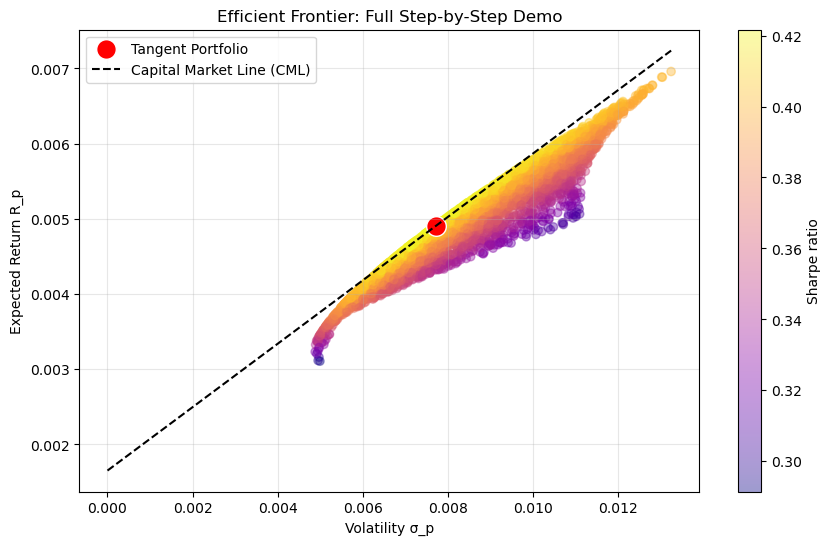

In [15]:
# -----------------------------
# Step 4: Explain instability
# -----------------------------
print("\nStep 4: Σ can be unstable for small datasets; direct inversion may produce extreme portfolio weights.")

# -----------------------------
# Step 5: Apply Ledoit-Wolf shrinkage
# -----------------------------
# Equation: Σ̂ = λ F + (1-λ) S
# S = sample covariance, F = target covariance (identity * avg variance)
np.random.seed(42)
n_months = 20*12
returns = np.random.multivariate_normal(mu, sigma, size=n_months)
returns_df = pd.DataFrame(returns, columns=tickers)
lw = LedoitWolf()
lw.fit(returns_df)
sigma_hat = lw.covariance_
print(f"\nStep 5: Shrunk covariance Σ̂ using Ledoit-Wolf (symbolically: Σ̂ = λ F + (1-λ) S):\n{pd.DataFrame(sigma_hat, index=tickers, columns=tickers)}")

# -----------------------------
# Step 6: Monte Carlo random portfolios
# -----------------------------
# Equations:
# R_p = w^T μ
# σ_p = sqrt(w^T Σ̂ w)
n_portfolios = 5000
weights_mc = np.random.rand(n_portfolios, 3)
weights_mc /= weights_mc.sum(axis=1)[:, None]
port_rets = weights_mc @ mu
port_vols = np.sqrt(np.einsum('ij,jk,ik->i', weights_mc, sigma_hat, weights_mc))
rf_monthly = (1+0.02)**(1/12)-1
sharpe = (port_rets - rf_monthly)/port_vols
print("\nStep 6: Monte Carlo simulated portfolios")
print(f"Example first 5 portfolio weights:\n{pd.DataFrame(weights_mc[:5], columns=tickers)}")
print(f"Corresponding returns (first 5): {port_rets[:5]}")
print(f"Corresponding volatilities (first 5): {port_vols[:5]}")
print(f"Corresponding Sharpe ratios (first 5): {sharpe[:5]}")

# -----------------------------
# Step 7: Find tangent portfolio
# -----------------------------
idx_max = np.argmax(sharpe)
tangent_w = weights_mc[idx_max]
tangent_ret = port_rets[idx_max]
tangent_vol = port_vols[idx_max]
tangent_sharpe = sharpe[idx_max]
print("\nStep 7: Tangent portfolio (max Sharpe, symbolically: w_tangent = argmax Sharpe):")
print(pd.DataFrame(tangent_w, index=tickers, columns=["Weight"]))
print(f"Expected return: {tangent_ret:.3%}")
print(f"Volatility: {tangent_vol:.3%}")
print(f"Sharpe ratio: {tangent_sharpe:.3f}")

# -----------------------------
# Step 8: Plot Efficient Frontier
# -----------------------------
plt.figure(figsize=(10,6))
sc = plt.scatter(port_vols, port_rets, c=sharpe, cmap='plasma', alpha=0.4)
plt.colorbar(sc, label="Sharpe ratio")
plt.scatter(tangent_vol, tangent_ret, color='red', s=200, edgecolor='white', label="Tangent Portfolio")
x = np.linspace(0, port_vols.max(), 100)
y = rf_monthly + tangent_sharpe * x
plt.plot(x, y, '--', color='black', label="Capital Market Line (CML)")
plt.xlabel("Volatility σ_p")
plt.ylabel("Expected Return R_p")
plt.title("Efficient Frontier: Full Step-by-Step Demo")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
